<a href="https://colab.research.google.com/github/CarolineOlive/Challenge_DataScience/blob/main/Challenge_Data_Science_Alura_Voz_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

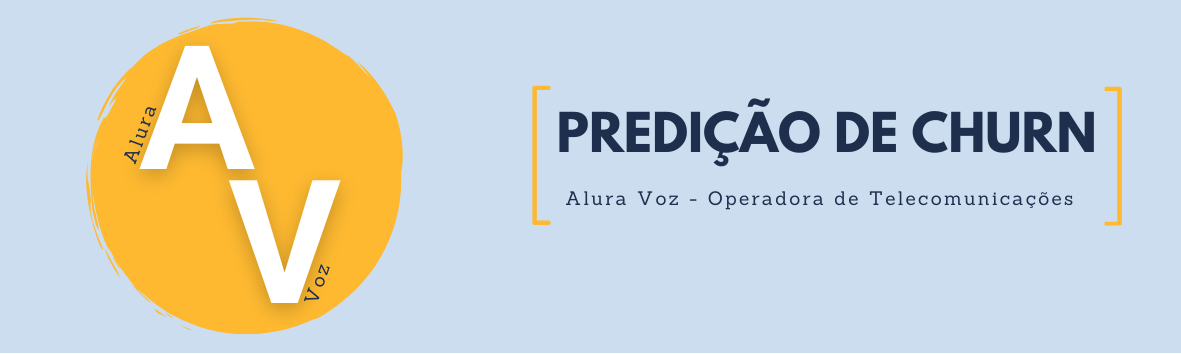

# <b>Challenge Data Science 1 (2022)</b>



Autora: Caroline Silva de Oliveira

E-mail: krolzinhaoliver@gmail.com

LinkedIn: www.linkedin.com/in/caroline-oliveira-quim

Github: https://github.com/CarolineOlive/Challenge_DataScience/blob/main/Challenge_Data_Science_Alura_Voz_2022.ipynb

<b>Contextualização e Objetivo</b>

A operadora de telecomunicações Alura Voz necessita de uma análise para a área de vendas da empresa, com o objetivo de reduzir a <i>Taxa de Evasão de Clientes</i>, conhecido como <i><b>Churn Rate</b></i> (taxa de saída dos clientes). Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Inicialmente é necessário fazer a idenficação de clientes que teriam uma maior chance de deixar a empresa investigando algumas características de clientes ou dos planos de clientes para tentar classificar estas pessoas como potenciais candidatas a deixar a empresa ou não.

<b>Dados</b>

O conjunto de dados disponibilizado via API foi tratado com foco na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

dados: https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json

Uma forma de pré-visualizar os dados contidos em uma json é utilizar a ferramenta online [Code Beautify](https://codebeautify.org/jsonviewer). Por meio dela é possível visualizar os níveis contidos no JSON.

A base de dados possui o número de identificação do cliente e se o cliente deixou ou não a empresa, e ainda, informações sobre:

* Cliente:
  * gender: gênero (masculino e feminino)
  * SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
  * Partner: se o cliente possui ou não um parceiro ou parceira
  * Dependents: se o cliente possui ou não dependentes
* Serviço de telefonia
  * tenure: meses de contrato do cliente
  * PhoneService: assinatura de serviço telefônico
  * MultipleLines: assisnatura de mais de uma linha de telefone
* Serviço de internet
  * InternetService: assinatura de um provedor internet
  * OnlineSecurity: assinatura adicional de segurança online
  * OnlineBackup: assinatura adicional de backup online
  * DeviceProtection: assinatura adicional de proteção no dispositivo
  * TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
  * StreamingTV: assinatura de TV a cabo
  * StreamingMovies: assinatura de streaming de filmes
* Contrato
  * Contract: tipo de contrato
  * PaperlessBilling: se o cliente prefere receber online a fatura
  * PaymentMethod: forma de pagamento
  * Charges.Monthly: total de todos os serviços do cliente por mês
  * Charges.Total: total gasto pelo cliente

<b>Etapas | Resumo</b>
* Tratamento de dados
* Análise explortória
  * Transformação dos dados em categóricos numéricos
  * Análise da variável Churn
  * Análise de correlação
* Modelagem
  * Teste modelo base
  * Divisão dos dados em treino e teste
  * Teste de modelos
    * Logistic Regression
    * Decision Tree Classifier
    * Random Forest Classifier
  * Balanceamento dos dados
    * Over-sampling
    * Under-sampling
    * SMOTE
  * Teste do modelo com dados de clientes sem informação de churn

  <b>Conclusão</b>

  Em uma perspectiva de retenção de clientes, é interessante conseguir prever aqueles com maior potencial de evasão. Sendo assim, o melhor modelo é aquele que possui maior taxa de acerto para churn (True positive ou verdadeiro positivo). Isso se deve ao fato de que, da perspectiva de negócio, é mais fácil e mais barato manter um cliente do que conseguir novos clientes.

  Sendo assim, optei por dar maior peso, ou seja, considerar como melhor modelo, aquele que retornou a menor quantidade de falsos negativos, modelo <font color ='#1e2f4d'><b>Decision Tree Classifier</b></font>.

  O modelo foi testado com a base de dados balanceado utilizando 3 abordagens, over-sampling, under-sampling e SMOTE. 

   A melhor performance se deu aplicando o SMOTE. Apesar do valor baixo para a precisão da variável 1 (churn), o recall melhorou muito, comparado com o resultado obtido com a base sem balanceamento, apresentando o menor número de falsos-positivos dentre as abordagens de balanceamento dos dados e redução dos falsos-negativos.

    Adicionalmente, optei por teste o modelo com os dados de clientes que estavam sem informações de churn na base de dados, fornecendo um lista de cliente e suas probabilidades de churn.

  Aplicando o modelo, 88 cliente foram classificados como churn e 136 como não prováveis de churn. A lista de clientes e probabilidades de churn foi disponibilizada para a empresa.



## Bibliotecas

In [ ]:
!pip install pandas-profiling
!pip install --upgrade pandas-profiling

In [ ]:
!pip install dataprep

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pandas_profiling import ProfileReport

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

## Funções

In [6]:
'''
Função criada para remover variáveis altamente correlacionadas
'''

def remove_corr_var(dados, valor_corte):

  matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
  excluir = [coluna for coluna in matrix_corr.columns if any(matrix_upper[coluna] > valor_corte)]

  return dados.drop(excluir, axis=1)

In [7]:
'''
Função criada para rodar o modelo com validação cruzada
'''

def roda_modelos_cv(modelo, dados, n_splits, n_repeats):
  
    np.random.seed(73246)
    y = dados['saida_cliente']
    x = dados.drop(columns='saida_cliente')
    
    #uso do repeated stratfied kfold e validação cruzada para dividir os dados em treino e teste
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    auc_std = np.std(resultados['test_score'])

    print(f'AUC {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino

In [8]:
'''
Função criada para balancear os dados com 'Over Sampling' e testar a performance dos modelos com os dados balanceados
'''

def over_sample(modelo):

  y = df_modelo_limpa['saida_cliente']
  x = df_modelo_limpa.drop(columns='saida_cliente')

  SEED = 77

  #separando os dadoss em teste e treino
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

  ros = RandomOverSampler(random_state=0)
  X_resampled, y_resampled = ros.fit_resample(treino_x, treino_y)

  # ver o balanceamento das classes
  print(pd.Series(y_resampled).value_counts())

  # instanciar e treinar um modelo de Regressão Logística
  modelo_res = modelo
  modelo_res.fit(X_resampled, y_resampled)

  previsoes_res = modelo_res.predict(teste_x)

  #Matriz de Confusão
  cm = confusion_matrix(teste_y, previsoes_res, labels=modelo_res.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_res.classes_)
  disp.plot(values_format = '.3g', cmap = 'Blues')

  print(100*'-')
  print('\nClassification Report:')
  print(classification_report(teste_y, previsoes_res))

  print(100*'-')
  prob_previsao_res = modelo_res.predict_proba(teste_x)[:,1]

  tfp, tvp, limite = roc_curve(teste_y, prob_previsao_res)
  print('roc_auc:', roc_auc_score(teste_y, prob_previsao_res))

  plt.subplots(1, figsize=(5,5))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
  plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.show()

In [9]:
'''
Função criada para balancear os dados com 'Under Sampling' e testar a performance dos modelos com os dados balanceados
'''
def under_sample(modelo):

  y = df_modelo_limpa['saida_cliente']
  x = df_modelo_limpa.drop(columns='saida_cliente')

  SEED = 77

  #separando os dadoss em teste e treino
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

  rus = RandomUnderSampler()
  X_resampled, y_resampled = rus.fit_resample(treino_x, treino_y)

  # ver o balanceamento das classes
  print(pd.Series(y_resampled).value_counts())

  # instanciar e treinar um modelo de Regressão Logística
  modelo_res = modelo
  modelo_res.fit(X_resampled, y_resampled)

  previsoes_res = modelo_res.predict(teste_x)

  #Matriz de Confusão
  cm = confusion_matrix(teste_y, previsoes_res, labels=modelo_res.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_res.classes_)
  disp.plot(values_format = '.3g', cmap = 'Blues')

  print(100*'-')
  print('\nClassification Report:')
  print(classification_report(teste_y, previsoes_res))

  print(100*'-')
  prob_previsao_res = modelo_res.predict_proba(teste_x)[:,1]

  tfp, tvp, limite = roc_curve(teste_y, prob_previsao_res)
  print('roc_auc:', roc_auc_score(teste_y, prob_previsao_res))

  plt.subplots(1, figsize=(5,5))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
  plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.show()

In [10]:
'''
Função criada para balancear os dados com 'Under Sampling' e testar a performance dos modelos com os dados balanceados
'''
def smote_sample(modelo):

  y = df_modelo_limpa['saida_cliente']
  x = df_modelo_limpa.drop(columns='saida_cliente')

  SEED = 77

  #separando os dadoss em teste e treino
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

  sm = SMOTE(random_state=SEED)
  X_resampled, y_resampled = sm.fit_resample(treino_x, treino_y)
  print('Resampled dataset shape %s' % Counter(y_resampled))

    # instanciar e treinar um modelo de Regressão Logística
  modelo_res = modelo
  modelo_res.fit(X_resampled, y_resampled)

  previsoes_res = modelo_res.predict(teste_x)

  #Matriz de Confusão
  cm = confusion_matrix(teste_y, previsoes_res, labels=modelo_res.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_res.classes_)
  disp.plot(values_format = '.3g', cmap = 'Blues')

  print(100*'-')
  print('\nClassification Report:')
  print(classification_report(teste_y, previsoes_res))

  print(100*'-')
  prob_previsao_res = modelo_res.predict_proba(teste_x)[:,1]

  tfp, tvp, limite = roc_curve(teste_y, prob_previsao_res)
  print('roc_auc:', roc_auc_score(teste_y, prob_previsao_res))

  plt.subplots(1, figsize=(5,5))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
  plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.show()

## Dados - Parte 1

In [11]:
#Importando os dados
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
linha, coluna = dados.shape
print(f'O conjunto de dados possui informações de {linha} clientes e {coluna} variáveis.')

O conjunto de dados possui informações de 7267 clientes e 6 variáveis.


In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


As variáveis 'customer', 'phone', 'internet' e 'account' apresentam dados em formato JSON. Estes dados precisam ser extraídos para acessar todos os dados dos clientes.
* Abrindo os JSON's dentro das colunas

In [14]:
# variável 'customer'
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [15]:
#variável 'phone'
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [16]:
#variável 'internet'
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [17]:
#variável 'account'
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [18]:
#removendo as colunas com json
dados.drop(columns=['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

In [19]:
#contatenando os dados abertos
dados_abertos = pd.concat([dados, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_abertos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Dados abertos

In [20]:
linha, coluna = dados_abertos.shape
print(f'O conjunto de dados possui informações de {linha} clientes e {coluna} variáveis.')

O conjunto de dados possui informações de 7267 clientes e 21 variáveis.


In [21]:
dados_abertos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

* Renomeando as colunas

In [22]:
colunas = {'customerID':'id_cliente', 'Churn':'saida_cliente', 'gender':'genero', 
           'SeniorCitizen':'idoso', 'Partner':'parceiro', 
           'Dependents':'dependentes', 'tenure':'meses_contrato',
           'PhoneService':'servico_telefonia', 'MultipleLines':'varias_linhas_telefonicas', 
           'InternetService':'provedor_internet', 'OnlineSecurity':'seguranca_online', 
           'OnlineBackup':'backup_online', 'DeviceProtection': 'protecao_de_dispositivo', 
           'TechSupport':'Suporte_tecnico', 'StreamingTV':'TV_a_cabo', 'StreamingMovies':'streaming_filmes', 
           'Contract':'tipo_contrato', 'PaperlessBilling':'fatura_digital', 'PaymentMethod':'metodo_pagamento',
           'Charges.Monthly':'cobrancas_Mensais', 'Charges.Total':'total_cobrancas'}

In [23]:
dados_abertos.rename(columns=colunas, inplace=True)

In [24]:
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   saida_cliente              7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   meses_contrato             7267 non-null   int64  
 7   servico_telefonia          7267 non-null   object 
 8   varias_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet          7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_de_dispositivo    7267 non-null   object 
 13  Suporte_tecnico            7267 non-null   objec

* <b>Tipos de dados</b>
  * Quantitativa
    * discreta
      * meses_contrato
    * Contínua
      * cobrancas_Mensais
      * total_cobrancas 
  * Qualitativa / categórica
    * Nominal
      * id_cliente 
      * saida_cliente 
      * genero
      * parceiro
      * dependentes
      * servico_telefonia
    * Ordinal / categórica
      


### Tratando os dados

In [25]:
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [26]:
#veirificando se há dados nulos
dados_abertos.isnull().sum()

id_cliente                   0
saida_cliente                0
genero                       0
idoso                        0
parceiro                     0
dependentes                  0
meses_contrato               0
servico_telefonia            0
varias_linhas_telefonicas    0
provedor_internet            0
seguranca_online             0
backup_online                0
protecao_de_dispositivo      0
Suporte_tecnico              0
TV_a_cabo                    0
streaming_filmes             0
tipo_contrato                0
fatura_digital               0
metodo_pagamento             0
cobrancas_Mensais            0
total_cobrancas              0
dtype: int64

Ao tentar converter os dados da coluna total_cobranca de string para float, houve o erro seguinte:
```
dados_abertos['total_cobrancas'] = pd.to_numeric(dados_abertos['total_cobrancas'], downcast="float")
````
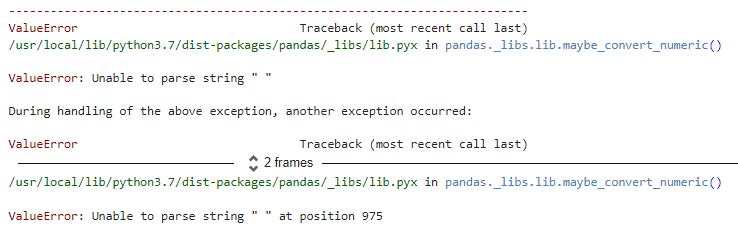

Assim, foi possível identificar a existência de dados vazios na coluna.
Os dados foram substituídos por zero, visto que os dados na coluna 'meses_contrato' é 0, indicando que nunhuma cobrança foi efetuada até o momento. 

In [27]:
#visualizando as celulas vazias
dados_abertos.query('total_cobrancas == " "')

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [28]:
#substituindo dados vazios
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].replace(" ", 0)

In [29]:
#convertendo string para float
dados_abertos['total_cobrancas'] = dados_abertos['total_cobrancas'].astype(float)

In [30]:
dados_abertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   saida_cliente              7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   idoso                      7267 non-null   int64  
 4   parceiro                   7267 non-null   object 
 5   dependentes                7267 non-null   object 
 6   meses_contrato             7267 non-null   int64  
 7   servico_telefonia          7267 non-null   object 
 8   varias_linhas_telefonicas  7267 non-null   object 
 9   provedor_internet          7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_de_dispositivo    7267 non-null   object 
 13  Suporte_tecnico            7267 non-null   objec

#### Verificando dados faltantes


In [31]:
dados_abertos.saida_cliente.unique()

array(['No', 'Yes', ''], dtype=object)

* coluna saida_cliente possui células com dados vazios.

In [32]:
#visualizando dados vazios
dados_abertos.query("saida_cliente == ''")

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


* avaliando demais colunas

In [33]:
dados_abertos.saida_cliente.unique()

array(['No', 'Yes', ''], dtype=object)

In [34]:
dados_abertos.genero.unique()

array(['Female', 'Male'], dtype=object)

In [35]:
dados_abertos.idoso.unique()

array([0, 1])

In [36]:
dados_abertos.parceiro.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
dados_abertos.dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dados_abertos.servico_telefonia.unique()

array(['Yes', 'No'], dtype=object)

In [39]:
dados_abertos.varias_linhas_telefonicas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [40]:
dados_abertos.seguranca_online.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
dados_abertos.backup_online.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [42]:
dados_abertos.protecao_de_dispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
dados_abertos.Suporte_tecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [44]:
dados_abertos.TV_a_cabo.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [45]:
dados_abertos.streaming_filmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [46]:
dados_abertos.fatura_digital.unique()

array(['Yes', 'No'], dtype=object)

In [47]:
dados_abertos.provedor_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
dados_abertos.tipo_contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [49]:
dados_abertos.metodo_pagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

* Dados quantitativos

In [50]:
dados_abertos.meses_contrato.count()

7267

In [51]:
dados_abertos.cobrancas_Mensais.count()

7267

In [52]:
dados_abertos.total_cobrancas.count()

7267

#### conferindo valor total

O dataset original já trouxe a informação de gasto total dos clientes. No entanto, é importante conferir se os valores foram calculados corretamente. Para tal, uma nova coluna de gasto total calculado será criada usando os valores de cobrança mensal e quantidade de meses de contrato.

In [53]:
dados_abertos['total_cobrancas_calculado'] = dados_abertos['meses_contrato'] * dados_abertos['cobrancas_Mensais'] #calculando o gasto total do cliente
dados_abertos['diferença_cobranca'] = dados_abertos['total_cobrancas'] - dados_abertos['total_cobrancas_calculado'] #verificando a diferença entre os valores
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70


* Gastos diários

In [54]:
dados_abertos['Gasto_diario'] = round(dados_abertos['cobrancas_Mensais'] / 30, 2) #calculando o gasto diário do cliente
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


### Conclusões parciais

O dataset original possui informações de 7267 clientes e 6 variáveis. 4 dados 6 colunas de variáveis possuiam dados no formato json que foram abertos, abtendo-se assim, um novo dataset com 21 variáveis, sendo 3 variáveis quantitativas e 18 qualitativas/categóricas.

<b>Tratamentos</b>
* tradução dos rótulos das colunas
* células com dados vazios foram identificadas nas colunas 'saida_cliente' e 'total_cobrancas' e tratadas;
* os dados da coluna 'total_cobrancas' foram convertidos de str para float;
* os valores totais foram conferidos criando uma nova coluna de totais calculado('total_cobrancas_calculado') e calculada a diferença entre os dois valores ('diferença_cobranca');
    * Foi observado que alguns valores foram cobrados a mais e outros a menos. Esse fato precissa ser considerado, avaliando se há relação entre valores cobrados e churn.
* o gasto mensal dos clientes foi calculado

O dataset tratado possui 7267 clientes e 24 variáveis.

## Análise Exploratória - Parte 2

In [55]:
from pandas_profiling import ProfileReport

A biblioteca Pandas Profilling nos permite gerar relatórios que permitem ter uma visão geral dos dados e obter diversasr informações como:
* Tipo das variáveis
* Análise descritiva das variáveis
* Alertas sobre possíveis problemas dentro do dataset
* Correlações
* Indicação de dados faltantes

No github, o relatório não é carregado corretamente. Para acessá-lo basta clicar [aqui](https://drive.google.com/drive/folders/1ZiKZCsZjAC0asDXatkhpay5vlQ68CeUG?usp=sharing) -  (Relatório 1) e você será direcionando para o arquivo no drive. Para visualizá-lo no formato interativo, basta baixar o arquivo `.html` em sua máquina.

* Visão inicial do relatório
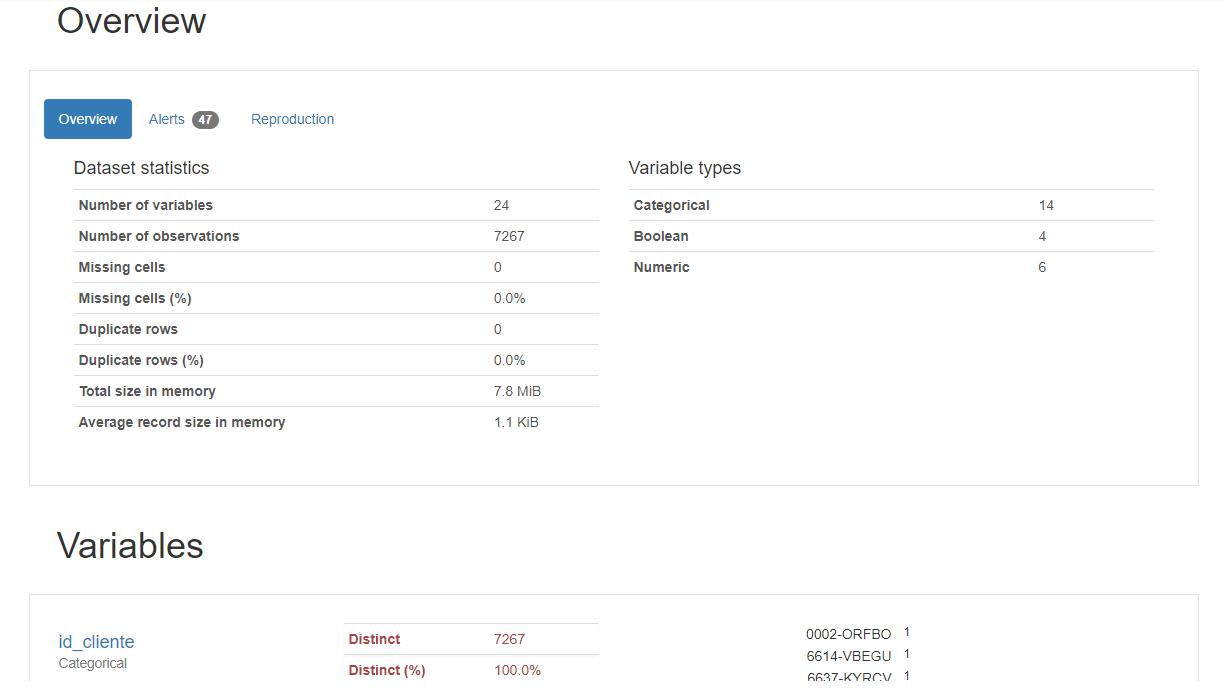

In [56]:
#gerando o Relatório 1
#profile = ProfileReport(dados_abertos, title = "Perfil dos dados dos clientes", explorative=True, plot={"histogram": {"bins": 50}}, orange_mode=False)
#profile

In [57]:
#exportando o report para acesso via web
#profile.to_file("Relatorio_1.html")

In [58]:
dados_abertos.head()

,id_cliente,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,...,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


In [59]:
#salvando uma cópia dos dados completos
dados_abertos_completo = dados_abertos.copy()

In [60]:
#Removendo a variável de identificação do cliente
dados_abertos.drop('id_cliente', axis = 1, inplace=True)

### Transformando os dados categóricos em categorias numéricas


In [61]:
#criando uma base de dados para modelagem para converter os dados nominais em categorias numéricas
dados_abertos_modelagem = dados_abertos.copy()

In [62]:
dados_abertos_modelagem.head()

,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,seguranca_online,...,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


####<b> Transformando os dados em categóricos numéricos usando `.map()` e `.cat.codes`</b>

In [63]:
dados_abertos_modelagem2 = dados_abertos.copy()

In [64]:
dados_abertos_modelagem2 = dados_abertos_modelagem2.query('saida_cliente != "No information"')

In [65]:
dados_abertos_modelagem2['saida_cliente'].unique()

array(['No', 'Yes', ''], dtype=object)

In [66]:
provedor = {'DSL':2, 
            'Fiber optic':1, 
            'No': 0}
dados_abertos_modelagem2['provedor_internet'] = dados_abertos_modelagem2['provedor_internet'].map(provedor)

In [67]:
contrato = {'One year':12, 
            'Month-to-month':1, 
            'Two year':24}
dados_abertos_modelagem2['tipo_contrato_meses']=dados_abertos_modelagem2.tipo_contrato.map(contrato)

In [68]:
dados_abertos_modelagem2['tipo_contrato']=dados_abertos_modelagem2.tipo_contrato.astype("category").cat.codes

In [69]:
dados_abertos_modelagem2.metodo_pagamento = dados_abertos_modelagem2.metodo_pagamento.astype("category").cat.codes

In [70]:
dados_abertos_modelagem2.genero = dados_abertos_modelagem2.genero.astype("category").cat.codes

In [71]:
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("Yes", 1)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No", 0)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No internet service", 2)
dados_abertos_modelagem2 = dados_abertos_modelagem2.replace("No phone service", 2)

In [72]:
dados_abertos_modelagem2

,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,seguranca_online,...,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,tipo_contrato_meses
0,0,0,0,1,1,9,1,0,2,0,...,0,1,1,3,65.60,593.30,590.40,2.90,2.19,12
1,0,1,0,0,0,9,1,1,2,0,...,1,0,0,3,59.90,542.40,539.10,3.30,2.00,1
2,1,1,0,0,0,4,1,0,1,0,...,0,0,1,2,73.90,280.85,295.60,-14.75,2.46,1
3,1,1,1,1,0,13,1,0,1,0,...,1,0,1,2,98.00,1237.85,1274.00,-36.15,3.27,1
4,1,0,1,1,0,3,1,0,1,0,...,0,0,1,3,83.90,267.40,251.70,15.70,2.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,2,1,...,0,1,0,3,55.15,742.90,716.95,25.95,1.84,12
7263,1,1,0,1,0,22,1,1,1,0,...,1,0,1,2,85.10,1873.70,1872.20,1.50,2.84,1
7264,0,1,0,0,0,2,1,0,2,0,...,0,0,1,3,50.30,92.75,100.60,-7.85,1.68,1
7265,0,1,0,1,1,67,1,0,2,1,...,1,2,0,3,67.85,4627.65,4545.95,81.70,2.26,24


In [73]:
dados_abertos_modelagem2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   saida_cliente              7267 non-null   object 
 1   genero                     7267 non-null   int8   
 2   idoso                      7267 non-null   int64  
 3   parceiro                   7267 non-null   int64  
 4   dependentes                7267 non-null   int64  
 5   meses_contrato             7267 non-null   int64  
 6   servico_telefonia          7267 non-null   int64  
 7   varias_linhas_telefonicas  7267 non-null   int64  
 8   provedor_internet          7267 non-null   int64  
 9   seguranca_online           7267 non-null   int64  
 10  backup_online              7267 non-null   int64  
 11  protecao_de_dispositivo    7267 non-null   int64  
 12  Suporte_tecnico            7267 non-null   int64  
 13  TV_a_cabo                  7267 non-null   int64

In [74]:
df_saida_cliente_sem_cat = dados_abertos_modelagem2.query('saida_cliente == ""')

In [75]:
dados_abertos_modelagem2 = dados_abertos_modelagem2.query('saida_cliente != ""')

In [76]:
dados_abertos_modelagem2.saida_cliente = dados_abertos_modelagem2.saida_cliente.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
dados_abertos_modelagem2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   saida_cliente              7043 non-null   int64  
 1   genero                     7043 non-null   int8   
 2   idoso                      7043 non-null   int64  
 3   parceiro                   7043 non-null   int64  
 4   dependentes                7043 non-null   int64  
 5   meses_contrato             7043 non-null   int64  
 6   servico_telefonia          7043 non-null   int64  
 7   varias_linhas_telefonicas  7043 non-null   int64  
 8   provedor_internet          7043 non-null   int64  
 9   seguranca_online           7043 non-null   int64  
 10  backup_online              7043 non-null   int64  
 11  protecao_de_dispositivo    7043 non-null   int64  
 12  Suporte_tecnico            7043 non-null   int64  
 13  TV_a_cabo                  7043 non-null   int64

[Relatório 2](https://drive.google.com/drive/folders/1ZiKZCsZjAC0asDXatkhpay5vlQ68CeUG?usp=sharing)

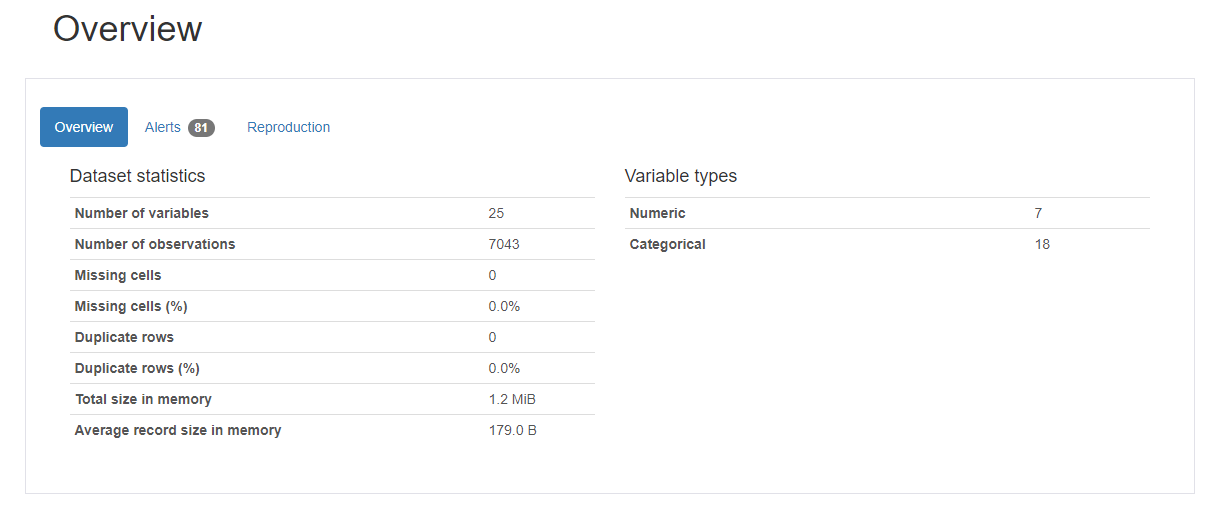

In [78]:
#Gerando novo Relatório de variáveis
#profile = ProfileReport(dados_abertos_modelagem2, title = "Perfil dos dados dos clientes", explorative=True, plot={"histogram": {"bins": 50}}, orange_mode=False)
#profile

In [79]:
#exportando o report para acesso via web
#profile.to_file("Relatorio_2.html")

#### **Conclusões parciais**
Temos uma base de dados desbalanceada, sendo 73,5% cliente que permanecem na empresa e 26,5% cliente em churn.
* Não Há diferença com relação ao gênero.
* Apenas 16,2% dos clientes são idosos
* Tempo max. de contrato são 72 meses 
* 90,3% dos clientes possuem serviço de telefonia
* Serviços relacionados à internet estão altamente correlacionados
* Os dados relacionados a pagamento (dinheiro) estão correlacionados


Variável parceiro altamente correlacionada com a variável dependentes (relação parceiroxcliente é 50%, mas a minoria tem dependentes)

### Avaliando o Churn

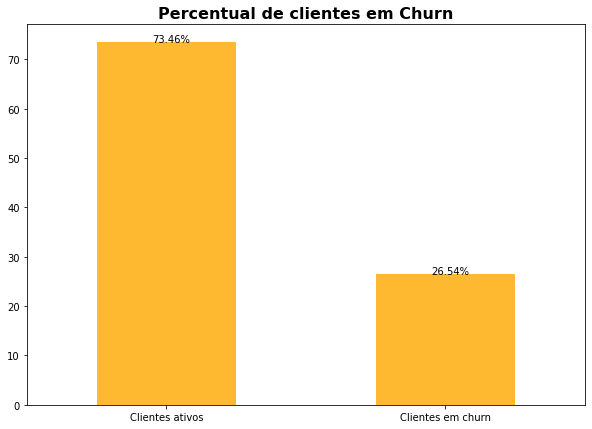

In [80]:
plt.figure(figsize=(10, 7))
ax = (dados_abertos_modelagem2['saida_cliente'].value_counts(normalize=True)*100).plot(kind="bar", rot=0, color='#feb930')
plt.title("Percentual de clientes em Churn", fontsize = 16, fontweight = "bold")
for p in ax.patches:
  ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+.2, p.get_height()))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Clientes ativos'
labels[1] = 'Clientes em churn'
ax.set_xticklabels(labels)

plt.show()

* **Churn por tempo de contrato**

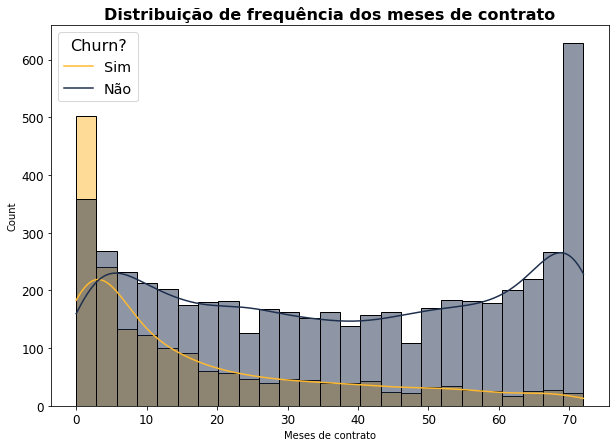

In [81]:
ax = sns.histplot(data = dados_abertos_modelagem2, x="meses_contrato", kde=True, hue="saida_cliente",  palette=['#1e2f4d','#feb930'], bins=25) #kde > cria a curva de distribuição
ax.figure.set_size_inches(10, 7)
ax.set_title("Distribuição de frequência dos meses de contrato", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Meses de contrato")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.legend(loc="best",  title="Churn?", labels=["Sim", "Não"], title_fontsize=16, fontsize="x-large")

plt.show()

A perda do cliente é muito maior nos primeiros meses de contratos

* **Churn por tipo de contrato**

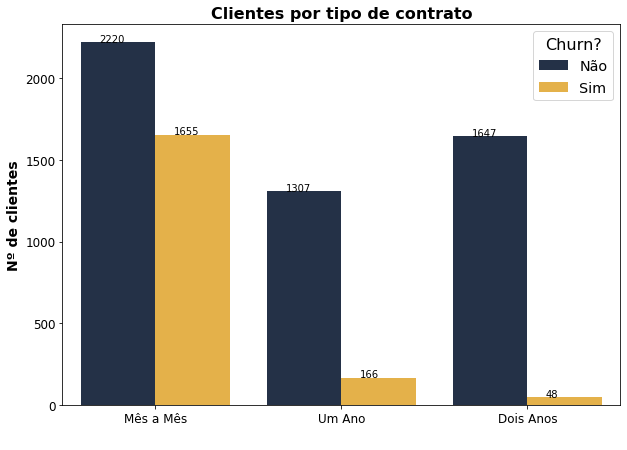

In [82]:
plt.figure(figsize=(10, 7))

ax = sns.countplot(x="tipo_contrato", data=dados_abertos_modelagem2, hue="saida_cliente", palette=['#1e2f4d','#feb930'])
plt.title("Clientes por tipo de contrato", fontsize = 16, fontweight = "bold")
plt.xlabel(" ", fontsize = 14, fontweight = "bold")
plt.ylabel("Nº de clientes",fontsize = 14, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Mês a Mês'
labels[1] = 'Um Ano'
labels[2] = 'Dois Anos'
ax.set_xticklabels(labels)

for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+1))

plt.legend(loc="best",  title="Churn?", labels=["Não", "Sim"], title_fontsize=16, fontsize="x-large")

plt.show()

In [83]:
dados_abertos_modelagem2[['tipo_contrato_meses', 'saida_cliente']].value_counts(normalize=True)*100

tipo_contrato_meses  saida_cliente
1                    0                31.520659
                     1                23.498509
24                   0                23.384921
12                   0                18.557433
                     1                 2.356950
24                   1                 0.681528
dtype: float64

* **Churn por diferença de valor pago**

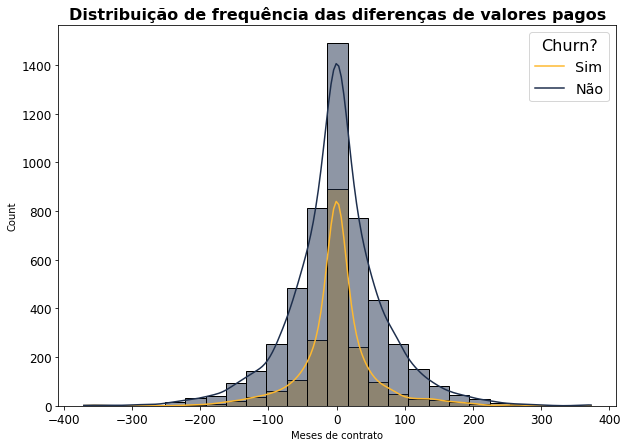

In [84]:
ax = sns.histplot(data = dados_abertos_modelagem2, x="diferença_cobranca", kde=True, hue="saida_cliente",  palette=['#1e2f4d','#feb930'], bins=25) 
ax.figure.set_size_inches(10, 7)
ax.set_title("Distribuição de frequência das diferenças de valores pagos", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Meses de contrato")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.legend(loc="best",  title="Churn?", labels=["Sim", "Não"], title_fontsize=16, fontsize="x-large")

plt.show()

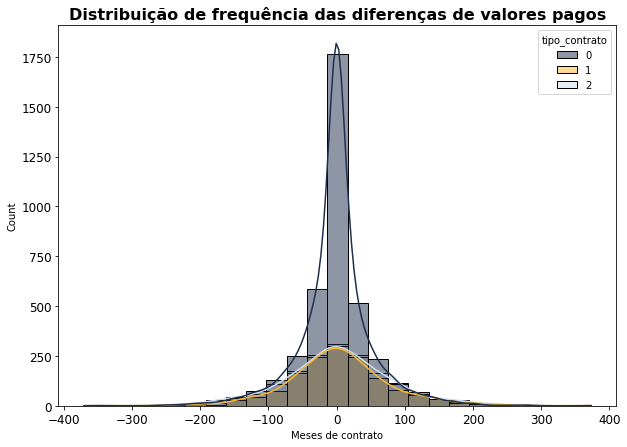

In [85]:
ax = sns.histplot(data = dados_abertos_modelagem2, x="diferença_cobranca", kde=True, hue="tipo_contrato",  palette=['#1e2f4d','#feb930', '#ccddef'], bins=25) 
ax.figure.set_size_inches(10, 7)
ax.set_title("Distribuição de frequência das diferenças de valores pagos", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Meses de contrato")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)


plt.show()

A distribuição dos dados é uma normal perfeita, mostrando que não houve impacto do erro de cobrança no churn.

In [86]:
#removendo colunas calculadas
dados_abertos_modelagem2.drop(columns=["total_cobrancas_calculado", 'diferença_cobranca', 'tipo_contrato_meses', 'Gasto_diario'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### **Conclusão parcial**
O Churn ocorre principalmente com clientes que possuem contratos mensais, logo nos primeiros meses de contrato.

### Avaliando a Correlação entre as variáveis

In [87]:
dados_abertos_modelagem2.shape

(7043, 20)

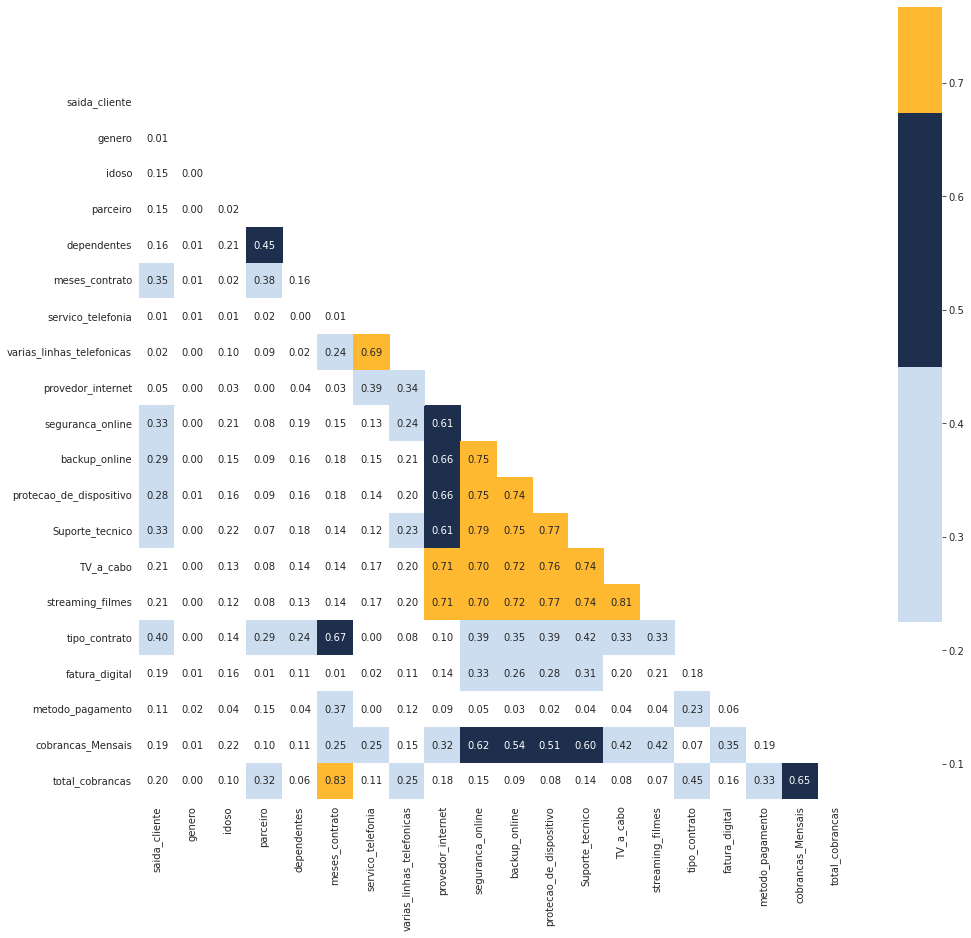

In [88]:
#criando a matriz de correlação e plotando o heatmap
matrix_corr = dados_abertos_modelagem2.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

In [89]:
df_modelo_limpa = remove_corr_var(dados_abertos_modelagem2, 0.75)

In [90]:
df_modelo_limpa.shape

(7043, 15)

#### **Conclusões parciais**
O dataset possui muitas variáveis altamente correlacionadas, principamente aquelas que foram criadas com base em dados já existentes, as quais podem gerar problemas de overfit nos modelos de predição.

O heatmap mostra uma grande área clara que indica baixa correlação entre as variáveis. Há apenas alguns pontos de maior destaque e  quadrados amarelos indicando que há algumas correlações com valores acima de 0.69. Estou considerando valores acima de 0.75 como uma alta correlação.

As features altamente correlacionadas foram removidas do dataset.

In [91]:
df_modelo_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   saida_cliente              7043 non-null   int64  
 1   genero                     7043 non-null   int8   
 2   idoso                      7043 non-null   int64  
 3   parceiro                   7043 non-null   int64  
 4   dependentes                7043 non-null   int64  
 5   meses_contrato             7043 non-null   int64  
 6   servico_telefonia          7043 non-null   int64  
 7   varias_linhas_telefonicas  7043 non-null   int64  
 8   provedor_internet          7043 non-null   int64  
 9   seguranca_online           7043 non-null   int64  
 10  protecao_de_dispositivo    7043 non-null   int64  
 11  tipo_contrato              7043 non-null   int8   
 12  fatura_digital             7043 non-null   int64  
 13  metodo_pagamento           7043 non-null   int8 

In [92]:
df_modelo_limpa['saida_cliente'].value_counts()

0    5174
1    1869
Name: saida_cliente, dtype: int64

In [93]:
df_modelo_limpa.shape

(7043, 15)

## Machine Learning - Parte 3

#### Modelo base

In [94]:
modelo_dummy = DummyClassifier(strategy="constant", constant=0)
roda_modelos_cv(modelo_dummy, df_modelo_limpa, 5, 10)

AUC 0.5 - 0.5


(0.5, 0.5)

#### Dividindo os dados em treino e teste

In [95]:
#Separando os dados em treino e teste
y = df_modelo_limpa['saida_cliente']
x = df_modelo_limpa.drop(columns='saida_cliente')

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

#### Logistic Regression

A base de treino tem 4930 elementos e as base de teste tem 2113 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.65      0.56      0.60       557

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8341873468314004
----------------------------------------------------------------------------------------------------


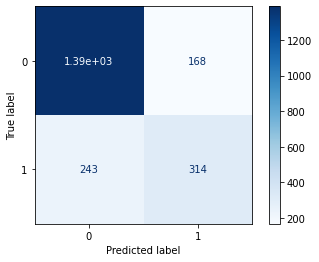

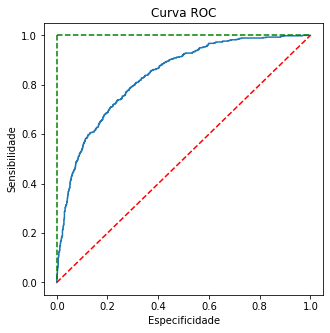

In [96]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos e as base de teste tem {base_teste} elementos.')

#Criando modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

########## Métricas ###########

#Matriz de Confusão
cm = confusion_matrix(teste_y, previsoes, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(values_format = '.3g', cmap = 'Blues')


#Classification Report
print(100*'-')
print('\nClassification Report:')
print(classification_report(teste_y, previsoes))

print(100*'-')
prob_previsao = modelo.predict_proba(teste_x)[:,1]

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc:', roc_auc_score(teste_y, prob_previsao))

print(100*'-')
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()

In [97]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 5174, 1: 1869})


##### Balanceando os dados e rodando o modelo

0    3618
1    3618
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1556
           1       0.49      0.80      0.61       557

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8326193157430782


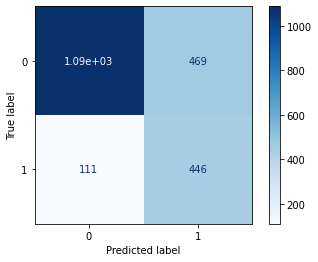

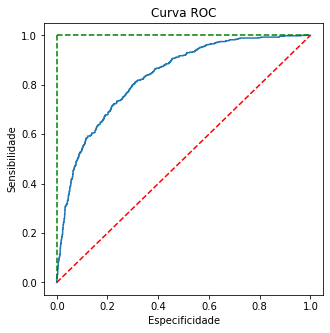

In [98]:
#Balanceando os dados com Over-sampling
over_sample(LogisticRegression(max_iter=1000))

0    1312
1    1312
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1556
           1       0.49      0.80      0.60       557

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8333923700691825


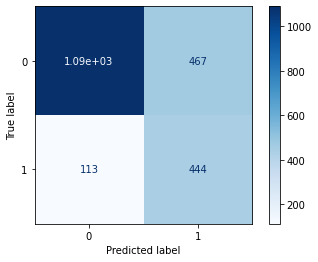

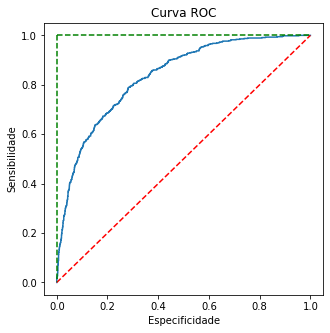

In [99]:
#Balanceando os dados com Under-sampling
under_sample(LogisticRegression(max_iter=1000))

Resampled dataset shape Counter({0: 3618, 1: 3618})
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1556
           1       0.50      0.74      0.60       557

    accuracy                           0.74      2113
   macro avg       0.69      0.74      0.70      2113
weighted avg       0.79      0.74      0.75      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8140902419775423


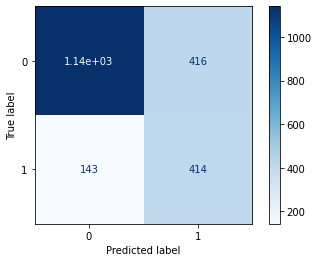

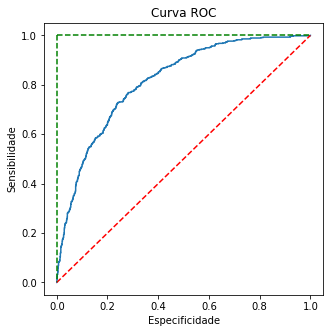

In [100]:
#Balanceando os dados com SMOTE
smote_sample(LogisticRegression(max_iter=1000))

#### Decision Tree Classifier

* Testando a performace do modelo alterando o valor do parâmetro max_depth

In [101]:
#testando a performace do modelo alterando o valor do parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,10):
  modelo_tree = DecisionTreeClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_tree, df_modelo_limpa, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.7282145302085595 - 0.7282158372676251
AUC 0.7812181891189482 - 0.7834848488162678
AUC 0.8062211328576374 - 0.8136644103983525
AUC 0.8250839820408169 - 0.8348517189994186
AUC 0.8289807173230804 - 0.8484333421508851
AUC 0.8233203198947838 - 0.8614325915495814
AUC 0.8129962554148332 - 0.8764778331923343
AUC 0.7977560001074575 - 0.8950785453551746
AUC 0.7801585611599191 - 0.915848286932581


A base de treino tem 4930 elementos e as base de teste tem 2113 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1556
           1       0.61      0.57      0.59       557

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8233559326727373


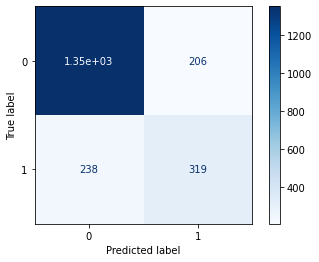

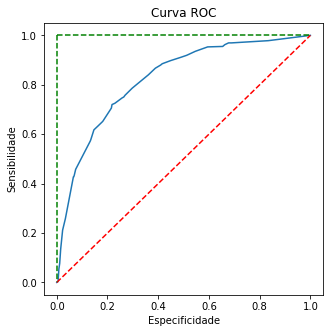

In [102]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos e as base de teste tem {base_teste} elementos.')

modelo_dtc = DecisionTreeClassifier(max_depth=6)
modelo_dtc.fit(treino_x, treino_y)

previsoes = modelo_dtc.predict(teste_x)

#Matriz de Confusão
cm = confusion_matrix(teste_y, previsoes, labels=modelo_dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_dtc.classes_)
disp.plot(values_format = '.3g', cmap = 'Blues')

print(100*'-')
print('\nClassification Report:')
print(classification_report(teste_y, previsoes))

print(100*'-')
prob_previsao = modelo_dtc.predict_proba(teste_x)[:,1]

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc:', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()

##### Balanceando os dados





0    3618
1    3618
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1556
           1       0.48      0.77      0.59       557

    accuracy                           0.72      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.72      0.74      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8142292763749983


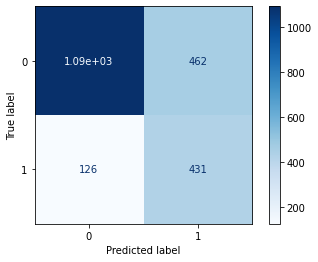

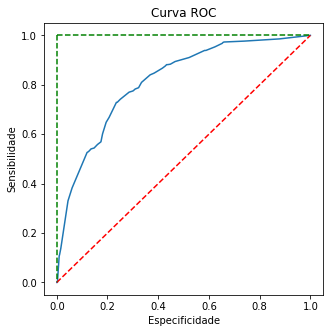

In [103]:
over_sample(DecisionTreeClassifier(max_depth=6))

0    1312
1    1312
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1556
           1       0.45      0.85      0.59       557

    accuracy                           0.68      2113
   macro avg       0.68      0.74      0.66      2113
weighted avg       0.79      0.68      0.70      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8077385045667896


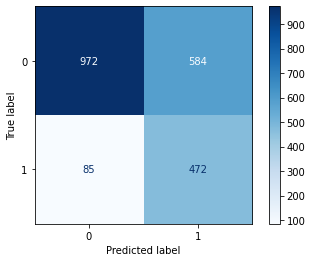

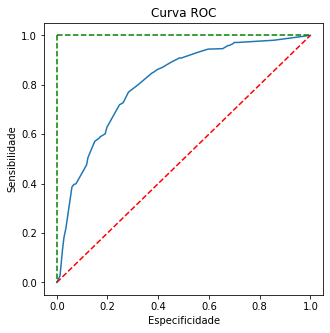

In [104]:
under_sample(DecisionTreeClassifier(max_depth=6))

Resampled dataset shape Counter({0: 3618, 1: 3618})
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1556
           1       0.51      0.73      0.60       557

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.79      0.74      0.75      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8067064193508189


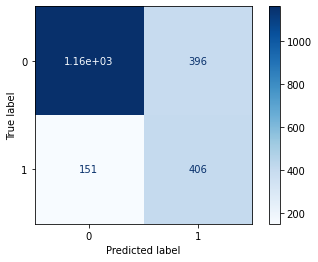

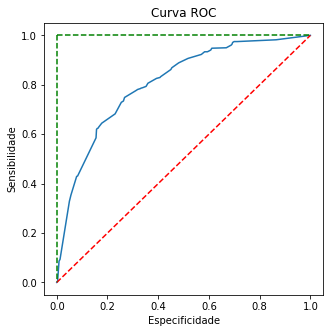

In [105]:
smote_sample(DecisionTreeClassifier(max_depth=6))

#### Random Forest Classifier

* Testando o parâmetro `n_estimator` obtive os seguintes resultados:



```
10
AUC 0.7863587449094278 - 0.9984029453920392
(0.7863587449094278, 0.9984029453920392)

50
AUC 0.8086662577383439 - 0.9998823746901028
(0.8086662577383439, 0.9998823746901028)

100
AUC 0.8121314069878864 - 0.9999200034125422
(0.8121314069878864, 0.9999200034125422)

200
AUC 0.813728733757576 - 0.9999385613190809
(0.813728733757576, 0.9999385613190809)
```



In [106]:
modelo_random = RandomForestClassifier(n_estimators=100)
roda_modelos_cv(modelo_random, df_modelo_limpa, 5, 10)

AUC 0.8121314069878864 - 0.9999200034125422


(0.8121314069878864, 0.9999200034125422)

* Testando o max_depth

In [107]:
#testando a performace do modelo alterando o valor do parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,10):
  modelo_random= RandomForestClassifier(max_depth=i, n_estimators=100)
  teste, treino = roda_modelos_cv(modelo_random, df_modelo_limpa, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.8194636877733398 - 0.8211934292642126
AUC 0.8291100305338395 - 0.8317683860570613
AUC 0.8348589041682491 - 0.8393834916154462
AUC 0.8391362103654728 - 0.846969691484767
AUC 0.8415662741123026 - 0.8553276562612987
AUC 0.8433642735539852 - 0.8667330803213059
AUC 0.8435560874886449 - 0.8823368644280518
AUC 0.8431806343987472 - 0.9023363334968392
AUC 0.8415717715431406 - 0.9253156288674714


A melhor performace foi obtida com o parâmetro `max_depth = 7`, o qual será usada para rodar o modelo.

**Rodando o modelo com os melhores parâmetros obtidos pelo teste.**


A base de treino tem 4930 elementos e as base de teste tem 2113 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1556
           1       0.66      0.51      0.58       557

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8395289214622957


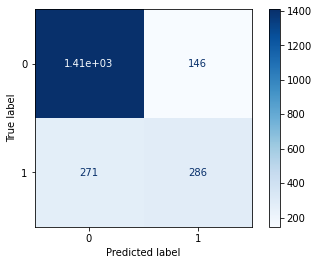

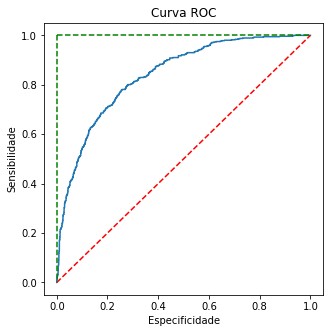

In [108]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos e as base de teste tem {base_teste} elementos.')

modelo_random = RandomForestClassifier(max_depth=7, n_estimators=100)
modelo_random.fit(treino_x, treino_y)

previsoes = modelo_random.predict(teste_x)

#Matriz de Confusão
cm = confusion_matrix(teste_y, previsoes, labels=modelo_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_random.classes_)
disp.plot(values_format = '.3g', cmap = 'Blues')

print(100*'-')
print('\nClassification Report:')
print(classification_report(teste_y, previsoes))

print(100*'-')
prob_previsao = modelo_random.predict_proba(teste_x)[:,1]

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc:', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha (indica um modelo totalmente aleatório)
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde (indica um modelo perfeito)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()


##### Balanceando os dados


0    3618
1    3618
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1556
           1       0.50      0.79      0.61       557

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.835818260696995


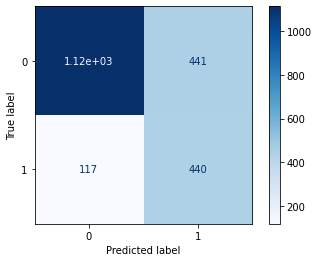

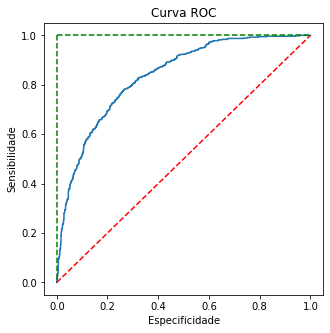

In [109]:
over_sample(RandomForestClassifier(max_depth=7, n_estimators=100))

0    1312
1    1312
Name: saida_cliente, dtype: int64
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1556
           1       0.48      0.82      0.60       557

    accuracy                           0.71      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.71      0.73      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8386895229216378


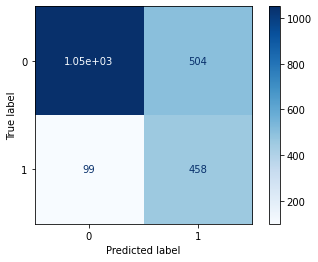

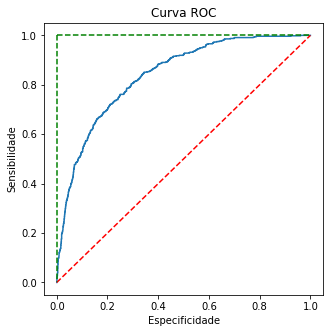

In [110]:
under_sample(RandomForestClassifier(max_depth=7, n_estimators=100))

Resampled dataset shape Counter({0: 3618, 1: 3618})
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1556
           1       0.52      0.74      0.61       557

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113

----------------------------------------------------------------------------------------------------
roc_auc: 0.8238757251711104


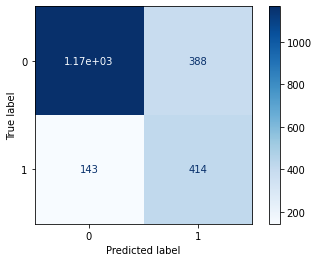

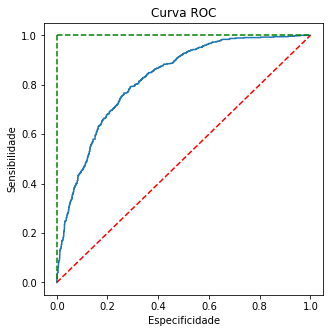

In [111]:
smote_sample(RandomForestClassifier(max_depth=7, n_estimators=100))

### Testando o modelos nos dados de clientes sem categoria de Churn



In [112]:
#Base de dados para teste do modelo - dados de clientes sem informações de churn
df_saida_cliente_sem_cat

,saida_cliente,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefonia,varias_linhas_telefonicas,provedor_internet,seguranca_online,...,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_Mensais,total_cobrancas,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,tipo_contrato_meses
30,,0,0,0,0,11,1,1,1,1,...,0,0,1,0,79.00,929.30,869.00,60.30,2.63,1
75,,1,0,0,0,71,1,0,0,2,...,2,2,1,1,19.90,1355.10,1412.90,-57.80,0.66,24
96,,1,0,0,0,29,1,0,2,1,...,0,1,1,2,58.75,1696.20,1703.75,-7.55,1.96,12
98,,0,1,0,0,5,1,0,2,1,...,0,0,0,1,59.90,287.85,299.50,-11.65,2.00,1
175,,1,1,1,0,65,1,1,1,0,...,1,1,1,0,103.15,6792.45,6704.75,87.70,3.44,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,,0,0,0,0,14,1,1,2,0,...,0,1,1,3,54.25,773.20,759.50,13.70,1.81,12
7180,,0,0,1,0,49,0,2,2,1,...,0,0,0,0,40.65,2070.75,1991.85,78.90,1.36,1
7211,,1,0,0,0,9,1,1,1,0,...,0,0,1,2,76.25,684.85,686.25,-1.40,2.54,1
7239,,0,0,1,1,67,1,0,0,2,...,2,2,1,0,19.25,1372.90,1289.75,83.15,0.64,24


In [113]:
#removendo colunas que não foram usadas no modelo
df_saida_cliente_sem_cat.drop(columns=["backup_online", 'Suporte_tecnico', 'TV_a_cabo', 'streaming_filmes','total_cobrancas', 'total_cobrancas_calculado', 'diferença_cobranca',
       'Gasto_diario', 'tipo_contrato_meses'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
sm = SMOTE(random_state=SEED)
X_resampled, y_resampled = sm.fit_resample(treino_x, treino_y)

# ver o balanceamento das classes
print(pd.Series(y_resampled).value_counts())

# instanciar e treinar um modelo de Regressão Logística
modelo_res = DecisionTreeClassifier(max_depth=6)
modelo_res.fit(X_resampled, y_resampled)

previsoes_res = modelo_res.predict(teste_x)

Acuracia = accuracy_score(teste_y, previsoes_res)
print('Acurácia: ', round(Acuracia, 5))

print(100*'-')
print('\nClassification Report:')
print(classification_report(teste_y, previsoes_res))

0    3618
1    3618
Name: saida_cliente, dtype: int64
Acurácia:  0.74113
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1556
           1       0.51      0.73      0.60       557

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.79      0.74      0.75      2113



In [115]:
df_saida_cliente_sem_cat.drop(columns='saida_cliente', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [116]:
#previsão
previsoes_res = modelo_res.predict(df_saida_cliente_sem_cat)
print(f'Probabilidade: {previsoes_res} \n')

#Probabilidade
prob_previsao_res = modelo_res.predict_proba(df_saida_cliente_sem_cat)
prob = prob_previsao_res[:,1]
print(f'Probabilidade: {prob}')

Probabilidade: [0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1
 0 0] 

Probabilidade: [0.42537313 0.         0.05319149 0.42537313 0.25641026 0.01288245
 0.77425204 0.86188993 0.80942184 0.86188993 0.04494382 0.775
 0.30555556 0.01288245 0.42537313 0.1147541  0.01288245 0.80942184
 0.04347826 0.01288245 0.42537313 0.38961039 0.86188993 0.23076923
 0.95771144 0.10810811 0.86188993 0.77425204 0.01288245 0.27741935
 0.22033898 0.22033898 0.01288245 0.         0.         0.77425204
 0.77425204 0.57458564 0.01288245 0.01288245 0.         0.95771144
 0.80942184 0.05319149 0.86188993 0.1328125  0.7

In [117]:
base_clientes_predicao = df_saida_cliente_sem_cat.copy()

In [118]:
#inserindo os dados de predição à base de dados
base_clientes_predicao['Churn_probabilidade'] = prob.tolist()
base_clientes_predicao['Churn_predicao'] = previsoes_res.tolist()

In [119]:
base_clientes_predicao.sort_values(by='Churn_probabilidade', ascending=False, inplace=True)

In [120]:
clientes_churn = base_clientes_predicao.loc[:, ['Churn_probabilidade']]
clientes_churn

,Churn_probabilidade
3365,0.957711
4579,0.957711
876,0.957711
4396,0.957711
1657,0.957711
...,...
5228,0.000000
2690,0.000000
1160,0.000000
6913,0.000000


In [121]:
indice_clientes_churn = clientes_churn.index.values

In [122]:
indice_clientes_churn = indice_clientes_churn.tolist()

In [123]:
df_clientes_churn = dados_abertos_completo.query('index in @indice_clientes_churn')

In [124]:
clientes_churn['id_cliente'] = df_clientes_churn['id_cliente']

In [125]:
#Lista de clientes e probabilidades de Churn
clientes_churn

,Churn_probabilidade,id_cliente
3365,0.957711,4674-LRJIC
4579,0.957711,6272-HWGNQ
876,0.957711,1232-TPUYA
4396,0.957711,6022-MXOMF
1657,0.957711,2353-VPYNS
...,...,...
5228,0.000000,7132-EASOG
2690,0.000000,3728-SDRGN
1160,0.000000,1645-EFCGT
6913,0.000000,9525-DKUVP


In [126]:
#Exportando lista de clientes (indices originais mantidos)
clientes_churn.to_csv('Probabilidade_churn_clientes.csv', index=False)

In [127]:
nao_churn, churn = base_clientes_predicao.Churn_predicao.value_counts()
print(f'Aplicando o modelo, {churn} cliente foram classificados como churn e {nao_churn} como não prováveis de churn.')

Aplicando o modelo, 88 cliente foram classificados como churn e 136 como não prováveis de churn.


## Conclusão

Em uma perspectiva de retenção de clientes, é interessante conseguir prever aqueles com maior potencial de evasão. Sendo assim, o melhor modelo é aquele que possui maior taxa de acerto para churn (True positive ou verdadeiro positivo). Isso se deve ao fato de que, da perspectiva de negócio, é mais fácil e mais barato manter um cliente do que conseguir novos clientes.

Sendo assim, optei por dar maior peso, ou seja, considerar como melhor modelo, aquele que retornou a menor quantidade de falsos negativos, modelo **Decision Tree Classifier**.

O modelo foi testado com a base de dados balanceado utilizando 3 abordagens, over-sampling, under-sampling e SMOTE. 

|Balanceamento|AUC|FP|FN|Precision|Recall|
|----|----|----|----|----|----|
|Over-sampling|0.814|462|126|0.9/0.48|0.7/0.77|
|Under-sampling|0.81|584|85|0.92/0.45|0.62/0.85|
|<b>SMOTE<b/>|0.81|<font color ='crimson'><b>396</b>|<font color ='crimson'><b>151</b>|0.88/0.51|0.75/0.73|
|Sem balanceamento|0.823|206|238|0.85/0.61|0.87/057|

A melhor performance se deu aplicando o SMOTE. Apesar do valor baixo para a precisão da variável 1 (churn), o recall melhorou muito, comparado com o resultado obtido com a base sem balanceamento, apresentando o menor número de falsos-positivos dentre as abordagens de balanceamento dos dados e redução dos falsos-negativos.

Adicionalmente, optei por teste o modelo com os dados de clientes que estavam sem informações de churn na base de dados, fornecendo um lista de cliente e suas probabilidades de churn.

Aplicando o modelo, 88 cliente foram classificados como churn e 136 como não prováveis de churn. A lista de clientes e probabilidades de churn foi disponibilizada para a empresa.



## Anexo

####<b> Outra forma de transformar os dados em categóricos numéricos usando `pd.getdummies`</b>

In [128]:
dados_num = dados_abertos_modelagem[['meses_contrato', 'cobrancas_Mensais', 'total_cobrancas']]

In [129]:
dados_dummy = dados_abertos_modelagem.drop(columns=['meses_contrato', 'cobrancas_Mensais', 'total_cobrancas'])
dados_dummy.head()

,saida_cliente,genero,idoso,parceiro,dependentes,servico_telefonia,varias_linhas_telefonicas,provedor_internet,seguranca_online,backup_online,protecao_de_dispositivo,Suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,total_cobrancas_calculado,diferença_cobranca,Gasto_diario
0,No,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,590.4,2.90,2.19
1,No,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,539.1,3.30,2.00
2,Yes,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,295.6,-14.75,2.46
3,Yes,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1274.0,-36.15,3.27
4,Yes,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,251.7,15.70,2.80


In [130]:
dados_dummy = pd.get_dummies(dados_dummy)
dados_dummy.head()

,idoso,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,saida_cliente_,saida_cliente_No,saida_cliente_Yes,genero_Female,genero_Male,parceiro_No,...,streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,fatura_digital_No,fatura_digital_Yes,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,590.4,2.90,2.19,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,539.1,3.30,2.00,0,1,0,0,1,1,...,1,1,0,0,1,0,0,0,0,1
2,0,295.6,-14.75,2.46,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1274.0,-36.15,3.27,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,1,251.7,15.70,2.80,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [131]:
dados_model = pd.concat([dados_num, dados_dummy], axis=1)

In [132]:
dados_model.head()

,meses_contrato,cobrancas_Mensais,total_cobrancas,idoso,total_cobrancas_calculado,diferença_cobranca,Gasto_diario,saida_cliente_,saida_cliente_No,saida_cliente_Yes,...,streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,fatura_digital_No,fatura_digital_Yes,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,9,65.6,593.30,0,590.4,2.90,2.19,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,9,59.9,542.40,0,539.1,3.30,2.00,0,1,0,...,1,1,0,0,1,0,0,0,0,1
2,4,73.9,280.85,0,295.6,-14.75,2.46,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,13,98.0,1237.85,1,1274.0,-36.15,3.27,0,0,1,...,1,1,0,0,0,1,0,0,1,0
4,3,83.9,267.40,1,251.7,15.70,2.80,0,0,1,...,0,1,0,0,0,1,0,0,0,1
